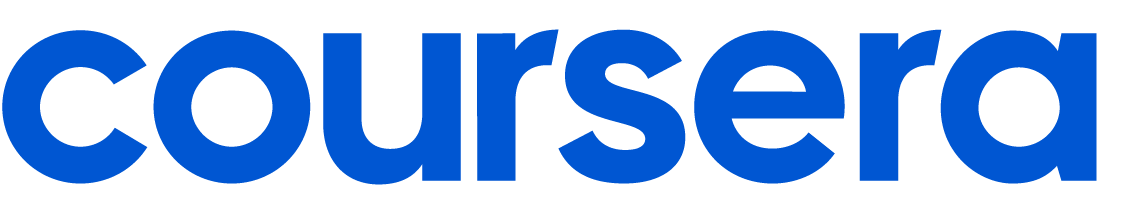

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [3]:
%%capture

!pip install --upgrade pip
!pip install --upgrade pandas
!pip install --upgrade seaborn
!pip install --upgrade numpy

# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Let's explain each line of code above:

1. `import pandas as pd`: Imports the pandas library, which provides data structures and data analysis tools.
2. `import numpy as np`: Imports the numpy library, which provides support for numerical operations and arrays.
3. `from sklearn.metrics import roc_auc_score`: Imports the roc_auc_score function from scikit-learn, which is used to evaluate the performance of classification models.
4. `from sklearn.model_selection import train_test_split`: Imports the train_test_split function from scikit-learn, which is used to split data into training and testing sets.
5. `from sklearn.dummy import DummyClassifier`: Imports the DummyClassifier class from scikit-learn, which is a simple classifier used for baseline comparison or testing purposes.
6. `from matplotlib import pyplot as plt`: Imports the pyplot module from the matplotlib library, which is used for creating visualizations and plots.
7. `import seaborn as sns`: Imports the seaborn library, which provides additional functionality for data visualization and statistical graphics.
8. `%matplotlib inline`: Sets the backend of matplotlib to display plots inline in the Jupyter notebook or similar environments.

In [2]:
%%capture

!pip install xgboost
!pip install --upgrade xgboost
!pip install --upgrade tensorflow

# Import any other packages you may want to use

# Standardize features 
from sklearn.preprocessing import StandardScaler

# eXtreme Gradient Boosting

import xgboost as xgb

# For deep-learning
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

1. `from sklearn.preprocessing import StandardScaler`: Imports the StandardScaler class from scikit-learn, which is used to standardize features by removing the mean and scaling to unit variance.
2. `import xgboost as xgb`: Imports the xgboost library, which provides the eXtreme Gradient Boosting (XGBoost) algorithm for machine learning.
3. `import tensorflow as tf`: Imports the tensorflow library, which is a popular deep learning framework.
4. `from tensorflow import keras`: Imports the keras module from tensorflow, which is a high-level neural networks API.
5. `from tensorflow.keras import layers`: Imports the layers module from keras, which provides various types of layers for building neural networks.

In [4]:
print('numpy ', np.__version__)
print('pandas ', pd.__version__)
print('seaborn ', sns.__version__)
print('xgboost', xgb.__version__)
print('tf ', tf.__version__)

numpy  1.21.6
pandas  1.3.5
seaborn  0.12.2
xgboost 1.6.2
tf  2.11.0


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


1. `train_df/test_df = pd.read_csv("train.csv")`: This line reads the CSV file named "train.csv" or "test.csv" and assigns its contents to the variable `train_df` using the pandas library.
2. `print('train_df/test_df Shape:', train_df.shape)`: This line prints the shape (number of rows and columns) of the `train_df/test_df` DataFrames, preceded by the text "train_df Shape:".
3. `train_df/test_df.head()`: This line displays the first few rows of the `train_df/test_df` DataFrame to provide a preview of the data.

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

### Data Validation

In [7]:
# getting the totals of missing values in each column

viz1 = (train_df.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .rename(columns={0:'Missing values'})) # renameing the row
viz1

,Missing values
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


In [8]:
# getting the totals of missing values in each column

viz2 = (test_df.isna()    # get the missing values
               .sum()      # add them up
               .to_frame() # make it look nice
               .rename(columns={0:'Missing values'})) # renameing the row
viz2

,Missing values
AccountAge,0
MonthlyCharges,0
TotalCharges,0
SubscriptionType,0
PaymentMethod,0
PaperlessBilling,0
ContentType,0
MultiDeviceAccess,0
DeviceRegistered,0
ViewingHoursPerWeek,0


1. `train_df/test_df.isna()`: Checks which values in `train_df/test_df` are missing (NaN or None).
2. `.sum()`: Calculates the sum of missing values for each column.
3. `.to_frame()`: Converts the resulting series into a DataFrame.
4. `.rename(columns={0:'Missing values'})`: Renames the column of the DataFrame to 'Missing values' for clarity.
5. `viz1/viz2`: Assigns the final DataFrame with the totals of missing values to the variable `viz1`.

Luckily, the datasets do not have any missing values. Now, let's explore the datasets.

### Exploratory Data Analysis (EDA)

In [9]:
# Select only a sample of the numerical columns from the DataFrame
sample_numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])

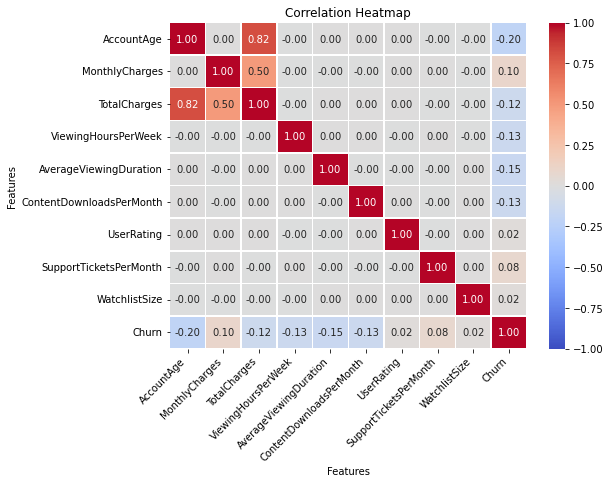

In [10]:
# plotting the correlations between the numerical variables

# Generate the correlation matrix
correlation_matrix = sample_numerical_columns.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.5, ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Heatmap")
ax.set_xlabel("Features")
ax.set_ylabel("Features")

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Show the plot
plt.show()


1. `correlation_matrix = sample_numerical_columns.corr()`: Computes the correlation matrix for the `sample_numerical_columns` DataFrame, which contains numerical columns.
2. `fig, ax = plt.subplots(figsize=(8, 6))`: Creates a figure and axes for the heatmap plot with a specified size of 8x6 inches.
3. `sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5, ax=ax)`: Generates a heatmap plot using seaborn (`sns`) with the correlation matrix. The plot includes annotations of the correlation values, displays them with two decimal places (`fmt=".2f"`), uses the "coolwarm" colormap, sets the minimum and maximum colorbar values to -1 and 1 respectively (`vmin=-1, vmax=1`), adds linewidths of 0.5 to separate the cells, and utilizes the specified axes (`ax`).

From the correlation matrix provided, we can learn the following:

- AccountAge has a **strong positive** correlation (0.82) with TotalCharges, indicating that as the account age increases, the total charges also tend to increase.
- MonthlyCharges and TotalCharges have a **moderate positive** correlation (0.50), suggesting that higher monthly charges are associated with higher total charges.
- Churn has a **negative correlation** with AccountAge (-0.20), MonthlyCharges (0.10), TotalCharges (-0.12), ViewingHoursPerWeek (-0.13), AverageViewingDuration (-0.15), ContentDownloadsPerMonth (-0.13), UserRating (0.02), SupportTicketsPerMonth (0.08), and WatchlistSize (0.02). These correlations indicate that some of these factors may influence the likelihood of churn, but the relationships are not very strong.
- None of the correlations between the remaining variables show strong or significant relationships.

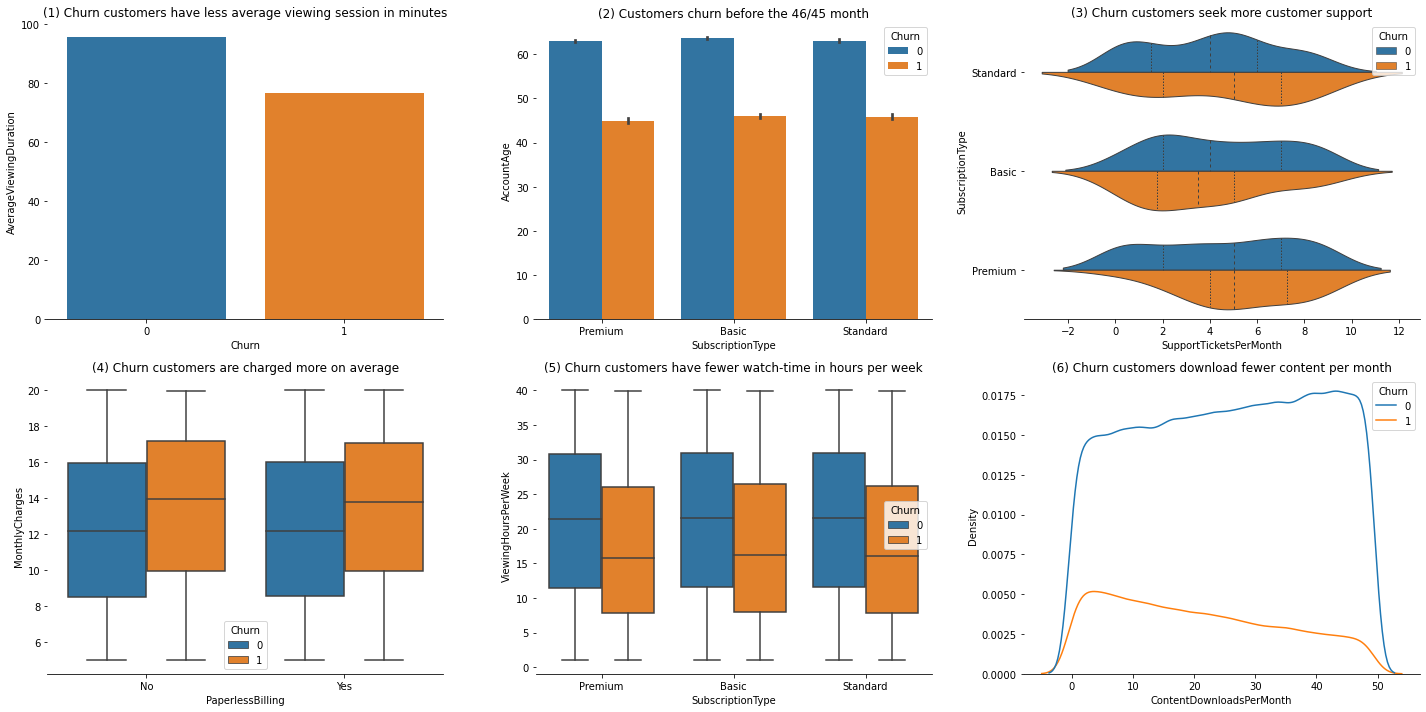

In [11]:
# Create subplots with desired layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.barplot(data=train_df, x='Churn', y='AverageViewingDuration', errorbar=('ci', False), ax=axes[0, 0])
axes[0,0].set_title('(1) Churn customers have less average viewing session in minutes')

sns.barplot(data=train_df, x='SubscriptionType', y='AccountAge', hue='Churn', ax=axes[0, 1])
axes[0,1].set_title('(2) Customers churn before the 46/45 month')

sns.violinplot(data=train_df.sample(500), y='SubscriptionType', x='SupportTicketsPerMonth', hue="Churn", 
               split=True, inner="quart", linewidth=1, ax=axes[0, 2])
axes[0,2].set_title('(3) Churn customers seek more customer support')

sns.boxplot(x="PaperlessBilling", y="MonthlyCharges", hue="Churn", data=train_df, ax=axes[1, 0])
axes[1,0].set_title('(4) Churn customers are charged more on average')

sns.boxplot(x="SubscriptionType", y="ViewingHoursPerWeek", hue="Churn", data=train_df, ax=axes[1, 1])
axes[1,1].set_title('(5) Churn customers have fewer watch-time in hours per week')

sns.kdeplot(data=train_df, x='ContentDownloadsPerMonth', hue='Churn', ax=axes[1, 2])
axes[1,2].set_title('(6) Churn customers download fewer content per month')

sns.despine(left=True)
plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

Here're the findings from the above graphs:

1. Churn customers have less average viewing session in minutes
2. Customers churn before the 46/45 month
3. Churn customers seek more customer support
4. Churn customers are charged more on average
5. Churn customers have fewer watch-time in hours per week
6. Churn customers download fewer content per month

<Figure size 576x432 with 0 Axes>

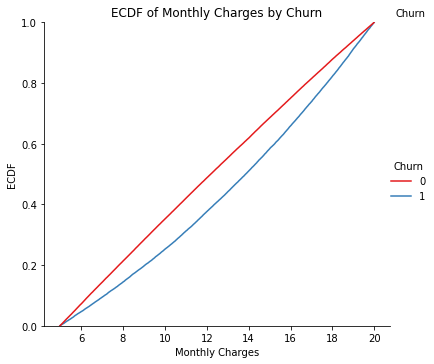

In [12]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the ecdf using displot
ax = sns.displot(data=train_df, x="MonthlyCharges", kind="ecdf", hue='Churn', palette="Set1")

# Set the axis labels
ax.set(xlabel="Monthly Charges", ylabel="ECDF")

# Set the title
ax.set(title="ECDF of Monthly Charges by Churn")

# Move the legend to the upper right corner
ax.add_legend(title="Churn", loc="upper right")

# Remove the top and right spines
sns.despine()

# Show the plot
plt.show()

In the context of the plotted ECDF of Monthly Charges by Churn, a diagonal line for one group (Churn = False) and a curved line for the other group (Churn = True) suggests that the two groups have different distributions for Monthly Charges. The curved line indicates that there are differences in the distribution of charges between the churned customers and non-churned customers.

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [13]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

1. `dummy_clf = DummyClassifier(strategy="stratified")`
   - This line creates an instance of a dummy classifier using the `DummyClassifier` class from scikit-learn. The classifier will use a "stratified" strategy, meaning it generates random predictions with the same class distribution as the training data.

2. `dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)`
   - This line fits the dummy classifier to the feature columns in `train_df` (excluding 'CustomerID' and 'Churn' columns) and the 'Churn' target variable. The classifier learns to make random predictions based on the "stratified" strategy.

In [14]:
pred_train_dummy = dummy_clf.predict_proba(train_df.drop(['CustomerID', 'Churn'], axis=1))[:, 1]

1. `pred_train_dummy = dummy_clf.predict_proba(train_df.drop(['CustomerID', 'Churn'], axis=1))[:, 1]`
   - This line makes predictions on the training data using the fitted `dummy_clf` (dummy classifier) using the `predict_proba` method.
   - The `predict_proba` method returns the predicted probabilities for each class for each data point. In this case, since we have a binary classification problem with classes 'Churn=0' and 'Churn=1', the result will be a 2D array with two columns (probabilities for each class) and rows corresponding to each data point in the training data.
   - The `[:, 1]` slicing at the end selects the second column from the 2D array, which corresponds to the probabilities of 'Churn=1' (positive class).
   - The resulting 1D array `pred_train_dummy` contains the predicted probabilities of 'Churn=1' for each data point in the training data.


The Dummy classifier has an accuracy of: 0.499385129730625


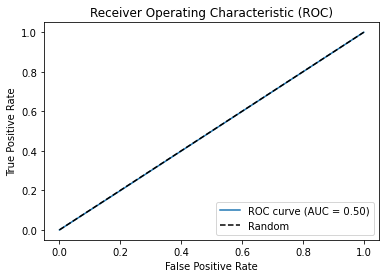

In [15]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(train_df.Churn, pred_train_dummy)
print("\nThe Dummy classifier has an accuracy of:", roc_auc)

def plot_roc_curve(true_labels, predicted_scores):
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_scores)

    # Calculate false positive rate, true positive rate, and threshold values for ROC curve
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_scores)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Example usage with train_df and pred_train_dummy
true_labels = train_df.Churn
predicted_scores = pred_train_dummy

# Call the function to plot ROC curve
plot_roc_curve(true_labels, predicted_scores)

1. Calculates the ROC AUC score between the 'Churn' target variable in `train_df` and the predicted probabilities (`pred_train_dummy`) using `roc_auc_score` function.
2. Prints the ROC AUC score, representing the accuracy of the Dummy classifier.
3. Defines a function `plot_roc_curve` to plot the ROC curve given true labels and predicted scores.
4. Calculates the ROC AUC score again, but this time within the `plot_roc_curve` function.
5. Calculates the false positive rate, true positive rate, and threshold values for the ROC curve using `roc_curve` function.
6. Plots the ROC curve with the AUC value and a dashed line for the random classifier.
7. Displays the ROC curve plot, illustrating the performance of the classifier in distinguishing between true positives and false positives.

Finally, the function `plot_roc_curve` is called with the 'Churn' labels (`true_labels`) and the predicted probabilities (`predicted_scores`) to visualize the ROC curve for the Dummy classifier.

So the baseline we have now is 50%. Can we do better with different models? Let's find out!

In [16]:
print(train_df.shape)
print(test_df.shape)

(243787, 21)
(104480, 20)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the original train and test DataFrames
train_encoded = train_df.drop(['CustomerID', 'Churn'], axis=1).copy()
test_encoded = test_df.drop(['CustomerID'], axis=1).copy()

# Iterate over each column in the train DataFrame
for column in train_encoded.columns:
    # Check if the column dtype is object (categorical)
    if train_encoded[column].dtype == 'object' or train_encoded[column].dtype == 'category':
        # Create a LabelEncoder instance
        label_encoder = LabelEncoder()
        # Fit and transform the column in the train DataFrame
        train_encoded[column] = label_encoder.fit_transform(train_encoded[column])
        # Transform the column in the test DataFrame
        test_encoded[column] = label_encoder.transform(test_encoded[column])


1. Imports the `LabelEncoder` class from `sklearn.preprocessing`.
2. Creates a copy of the original `train_df` DataFrame as `train_encoded` and the `test_df` DataFrame as `test_encoded`. These copies will be used to encode the categorical features.
3. Iterates over each column in the `train_encoded` DataFrame.
4. For each column, it checks if the data type is either 'object' or 'category', indicating that the column is a categorical feature.
5. If the column is categorical, it creates an instance of the `LabelEncoder`.
6. The `LabelEncoder` is then used to fit and transform the categorical column in the `train_encoded` DataFrame. This means that it assigns a unique integer value to each category in the column.
7. After encoding the training data, the same transformation is applied to the corresponding column in the `test_encoded` DataFrame using the already fitted `LabelEncoder`. This ensures that the same encoding scheme is applied consistently to both the training and test datasets.

The process of label encoding is used to convert categorical variables into numerical format, which is necessary for some machine learning algorithms that cannot directly handle categorical data. It assigns a unique numerical representation to each category, allowing the models to work with these features more effectively. However, it's important to note that label encoding does not create any ordinal relationship between categories; it merely provides numerical representations for them.

In [18]:
print(train_encoded.shape)
print(test_encoded.shape)

(243787, 19)
(104480, 19)


In [19]:
# splitting the data

x_train, dev_test, x_labels, dev_labels = train_test_split(train_encoded.iloc[:,:], # changed
                                                           train_df.Churn, 
                                                           test_size=0.01, 
                                                           random_state=1, 
                                                           shuffle=True)

print('x_train shape:', x_train.shape)
print('x_labels shape:', x_labels.shape)
print('dev_test shape:', dev_test.shape)
print('dev_labels shape:', dev_labels.shape)

x_train shape: (241349, 19)
x_labels shape: (241349,)
dev_test shape: (2438, 19)
dev_labels shape: (2438,)


In [20]:
# normalizing the datasets

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
dev_test_scaled = scaler.transform(dev_test)
test_encoded_scaled = scaler.transform(test_encoded)

# displaying the data

print('train data shape')
print(x_train.shape)

print('dev data shape')
print(dev_test.shape)

print('test data shape')
print(test_encoded.shape)

train data shape
(241349, 19)
dev data shape
(2438, 19)
test data shape
(104480, 19)


1. Creates an instance of the `StandardScaler` class from `sklearn.preprocessing`, which is used for standardization of features.
2. Applies the `fit_transform` method of the `StandardScaler` to `x_train`, scaling the training data. The `fit_transform` method computes the mean and standard deviation of the features in `x_train` and then scales the data accordingly. It returns the scaled training data as `x_train`.
3. Applies the `transform` method of the `StandardScaler` to `dev_test`, scaling the development/testing data. The `transform` method uses the mean and standard deviation computed during the `fit_transform` step on `x_train` to scale the data in `dev_test`. The scaled development/testing data is stored in `dev_test_scaled`.
4. Applies the `transform` method of the `StandardScaler` to `test_encoded`, scaling the test data. Similar to the previous step, it uses the mean and standard deviation from `x_train` to scale the data in `test_encoded`. The scaled test data is stored in `test_encoded_scaled`.

The purpose of using the `StandardScaler` is to standardize the features in the datasets, making them have zero mean and unit variance. Standardization is useful for many machine learning algorithms, particularly those that are sensitive to the scale of the features. By scaling the data, you ensure that the features are on a similar scale, which can improve the performance and convergence of certain algorithms.

In [49]:
tf.random.set_seed(42)  # For more consistent results

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


1. `tf.random.set_seed(42)`: This sets the random seed to 42 in TensorFlow, which ensures that the random number generation for the neural network is reproducible. Setting a random seed helps produce consistent results across different runs.

2. `model = keras.Sequential([...])`: This creates a sequential neural network model using Keras. A sequential model is appropriate for a plain stack of layers, where each layer has exactly one input tensor and one output tensor.

3. `layers.Dense(64, activation="relu")`: This adds a fully connected (dense) layer with 64 units/neurons to the model. The activation function used for this layer is the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity to the network.

4. `layers.Dropout(0.2)`: This adds a dropout layer with a dropout rate of 0.2. Dropout is a regularization technique that randomly sets a fraction of the input units to 0 during training. It helps prevent overfitting by reducing interdependence between neurons.

5. `layers.Dense(128, activation="relu")`: This adds another fully connected (dense) layer with 128 units/neurons and ReLU activation function.

6. `layers.Dense(64, activation="relu")`: This adds another fully connected (dense) layer with 64 units/neurons and ReLU activation function.

7. `layers.Dense(32, activation="relu")`: This adds another fully connected (dense) layer with 32 units/neurons and ReLU activation function.

8. `layers.Dense(1, activation="sigmoid")`: This adds the final output layer with 1 unit/neuron and a sigmoid activation function. Since this is a binary classification problem (1 or 0), the sigmoid function maps the output values to probabilities in the range [0, 1].

The given model architecture consists of multiple fully connected layers with ReLU activation, followed by dropout regularization, and a final output layer with a sigmoid activation for binary classification.

In [50]:
from sklearn.utils.class_weight import compute_class_weight

# Convert TensorFlow tensor to NumPy array
x_labels_np = np.array(x_labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(x_labels_np), y=x_labels_np)

# Convert class weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

class_weights_dict

{0: 0.6106329254840048, 1: 2.75972511263064}

The code snippet calculates class weights for imbalanced datasets using scikit-learn's `compute_class_weight` function. It converts TensorFlow tensor `x_labels` to a NumPy array, computes class weights with the 'balanced' option, and creates a dictionary of class indices and their corresponding class weights.

In [51]:
# putting the model together

tf.random.set_seed(1)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001, amsgrad=True),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    # List of metrics to monitor
    metrics=[keras.metrics.AUC(), keras.metrics.binary_accuracy]
)

history = model.fit(x_train, x_labels, validation_split=0.1, epochs=50, class_weight=class_weights_dict)

Epoch 1/50
6788/6788 [==============================] - 22s 3ms/step - loss: 0.6010 - auc_7: 0.7384 - binary_accuracy: 0.6600 - val_loss: 0.5921 - val_auc_7: 0.7462 - val_binary_accuracy: 0.6817
Epoch 2/50
6788/6788 [==============================] - 20s 3ms/step - loss: 0.5953 - auc_7: 0.7452 - binary_accuracy: 0.6666 - val_loss: 0.5938 - val_auc_7: 0.7463 - val_binary_accuracy: 0.6617
Epoch 3/50
6788/6788 [==============================] - 20s 3ms/step - loss: 0.5947 - auc_7: 0.7459 - binary_accuracy: 0.6676 - val_loss: 0.6471 - val_auc_7: 0.7462 - val_binary_accuracy: 0.6343
Epoch 4/50
6788/6788 [==============================] - 20s 3ms/step - loss: 0.5938 - auc_7: 0.7467 - binary_accuracy: 0.6656 - val_loss: 0.5969 - val_auc_7: 0.7469 - val_binary_accuracy: 0.6597
Epoch 5/50
6788/6788 [==============================] - 20s 3ms/step - loss: 0.5936 - auc_7: 0.7470 - binary_accuracy: 0.6682 - val_loss: 0.6092 - val_auc_7: 0.7469 - val_binary_accuracy: 0.6472
Epoch 6/50
6788/6788 [===

1. `tf.random.set_seed(1)`: Sets the random seed to 1 in TensorFlow to ensure reproducibility.

2. `model.compile(...)`: Compiles the neural network model using Keras's `compile` method. It specifies the optimizer as Adam with AMSGrad (`amsgrad=True`), the loss function as binary cross-entropy with logits (`from_logits=True`), and the evaluation metrics as AUC (Area Under the Curve) and binary accuracy.

3. `history = model.fit(...)`: Fits the compiled model to the training data (`x_train` and `x_labels`) using the `fit` method. It trains the model for 50 epochs, with a validation split of 0.1 (10% of the data used for validation during training). Additionally, it applies class weights to address class imbalance during training, using the `class_weights_dict` dictionary computed previously.

The `model.fit` function will return the training history, which includes information about the model's training progress, such as the loss and metric values at each epoch. This information can be used for further analysis and visualization.

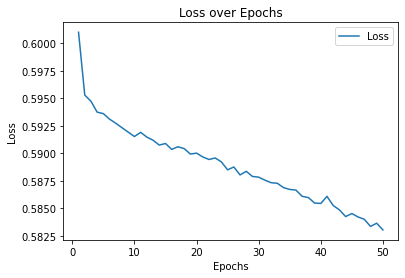

In [52]:
# accessing the loss values from the history object
losses = model.history.history['loss']

# creating x-axis values (epochs)
epochs = range(1, len(losses) + 1)

# plotting the losses
plt.plot(epochs, losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

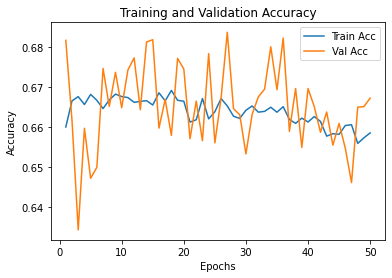

In [53]:
# After running the model.fit() code provided

# Access the binary accuracy values from the history object
train_acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

# Plot the training and validation accuracy over epochs
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Acc')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [32]:
model.evaluate(dev_test_scaled, dev_labels, verbose=0)

[0.5907371640205383, 0.7408488392829895, 0.6636587381362915]

In [54]:
# using the model to predict the unlabeled data (from the test dataset)

predictions = model.predict(dev_test_scaled)
print(predictions[:3])

77/77 [==============================] - 0s 1ms/step
[[0.41804585]
 [0.53494173]
 [0.31426904]]


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels 'y_true' and predicted labels 'y_pred' for a single class

y_pre = [0 if x < 0.5 else 1 for x in predictions]

# Calculate accuracy
accuracy = accuracy_score(dev_labels, y_pre)

# Calculate precision
precision = precision_score(dev_labels, y_pre)

# Calculate recall
recall = recall_score(dev_labels, y_pre)

# Calculate F1-score
f1 = f1_score(dev_labels, y_pre)

# Print the classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.6694011484823625
Precision: 0.3185108583247156
Recall: 0.676923076923077
F1-Score: 0.43319268635724334


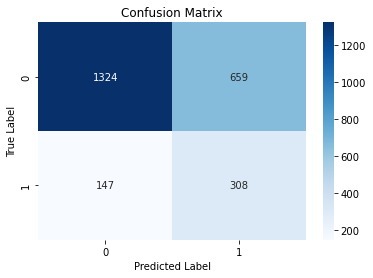

In [56]:
from sklearn.metrics import confusion_matrix

# Assuming you have true labels 'y_true' and predicted labels 'y_pred' for binary classification

# Calculate the confusion matrix
cm = confusion_matrix(dev_labels, y_pre)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

roc_auc_score: 0.7432328639590364


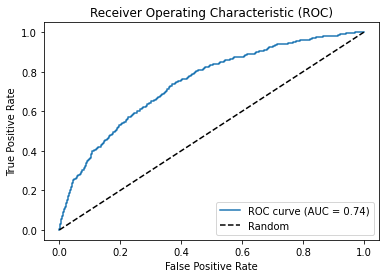

In [57]:
roc_auc3 = roc_auc_score(dev_labels, predictions)
print("roc_auc_score:", roc_auc3)

plot_roc_curve(dev_labels, predictions)

In [58]:
# predicting the test dataset

predicted_probability = model.predict(test_encoded_scaled)

3265/3265 [==============================] - 4s 1ms/step


In [59]:
predicted_probability.reshape(-1,).shape

(104480,)

In [60]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability.reshape(-1,)})

In [61]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.470324
1,LFR4X92X8H,0.210653
2,QM5GBIYODA,0.719329
3,D9RXTK2K9F,0.135063
4,ENTCCHR1LR,0.502694
5,7A88BB5IO6,0.710880
6,70OMW9XEWR,0.411677
7,EL1RMFMPYL,0.662575
8,4IA2QPT6ZK,0.473894
9,AEDCWHSJDN,0.502513


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [62]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [63]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [64]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [65]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [66]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!